In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv('NEWcleanedDATA.csv')
N = len(data)
X = np.zeros((N, 4))
X[:, 0] = data['u'] - data['g']
X[:, 1] = data['g'] - data['r']
X[:, 2] = data['r'] - data['i']
X[:, 3] = data['i'] - data['z']
z = data['redshift']

In [2]:
Ntrain = 3 * N // 4
Xtrain = X[:Ntrain]
ztrain = z[:Ntrain]
Xtest = X[Ntrain:]
ztest = z[Ntrain:]

In [3]:
from sklearn.tree import DecisionTreeRegressor
clf = DecisionTreeRegressor()
clf.fit(Xtrain, ztrain)
zpred = clf.predict(Xtest)

In [4]:
rmse = np.sqrt(np.mean((ztest - zpred)**2))
print(rmse)

0.16498301979227617


In [5]:
print(len(ztest))
print(np.sum(abs(ztest - zpred) > 1))

11871
129


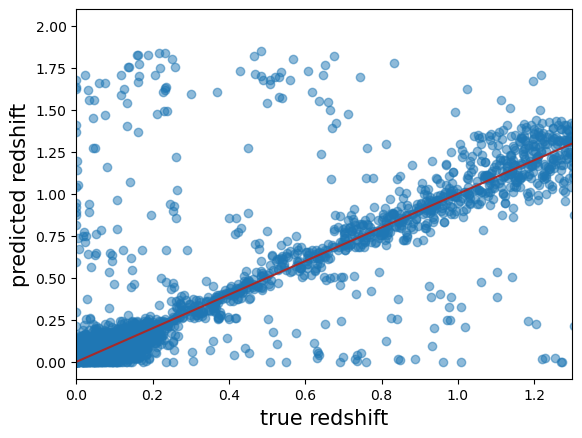

In [9]:
plt.figure()
plt.plot(np.arange(0,3), color = 'brown')
plt.scatter(ztest, zpred, alpha = 0.5)

plt.xlabel('true redshift', fontsize = 15)
plt.ylabel('predicted redshift', fontsize = 15)
plt.xlim(0, 1.3)
plt.savefig('Predicted Vs True Redshift')

In [41]:
history = clf.fit(Xtrain, ztrain)

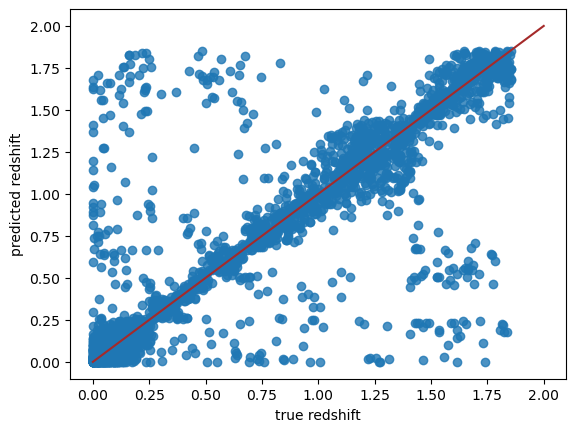

In [16]:
plt.figure()
plt.scatter(ztest, zpred, alpha = 0.8)

plt.plot(np.arange(0,3), color = 'brown')
plt.xlabel('true redshift')
plt.ylabel('predicted redshift')
plt.savefig('Predicted Vs True Redshift - DTR')

In [ ]:

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
axes = axes.ravel()

color_features = ['u-g', 'g-r', 'r-i', 'i-z']

for i, feature in enumerate(color_features):
    axes[i].scatter(Xtrain[:, i], ztrain, alpha=0.5, marker='.')
    axes[i].set_xlabel(f'{feature} Color', fontsize = 15)
    axes[i].set_ylabel('Redshift', fontsize = 15)
    axes[i].set_title(f'Scatter plot: {feature} vs. Redshift', fontsize = 15)

plt.tight_layout()
plt.show()
plt.savefig('u-g')

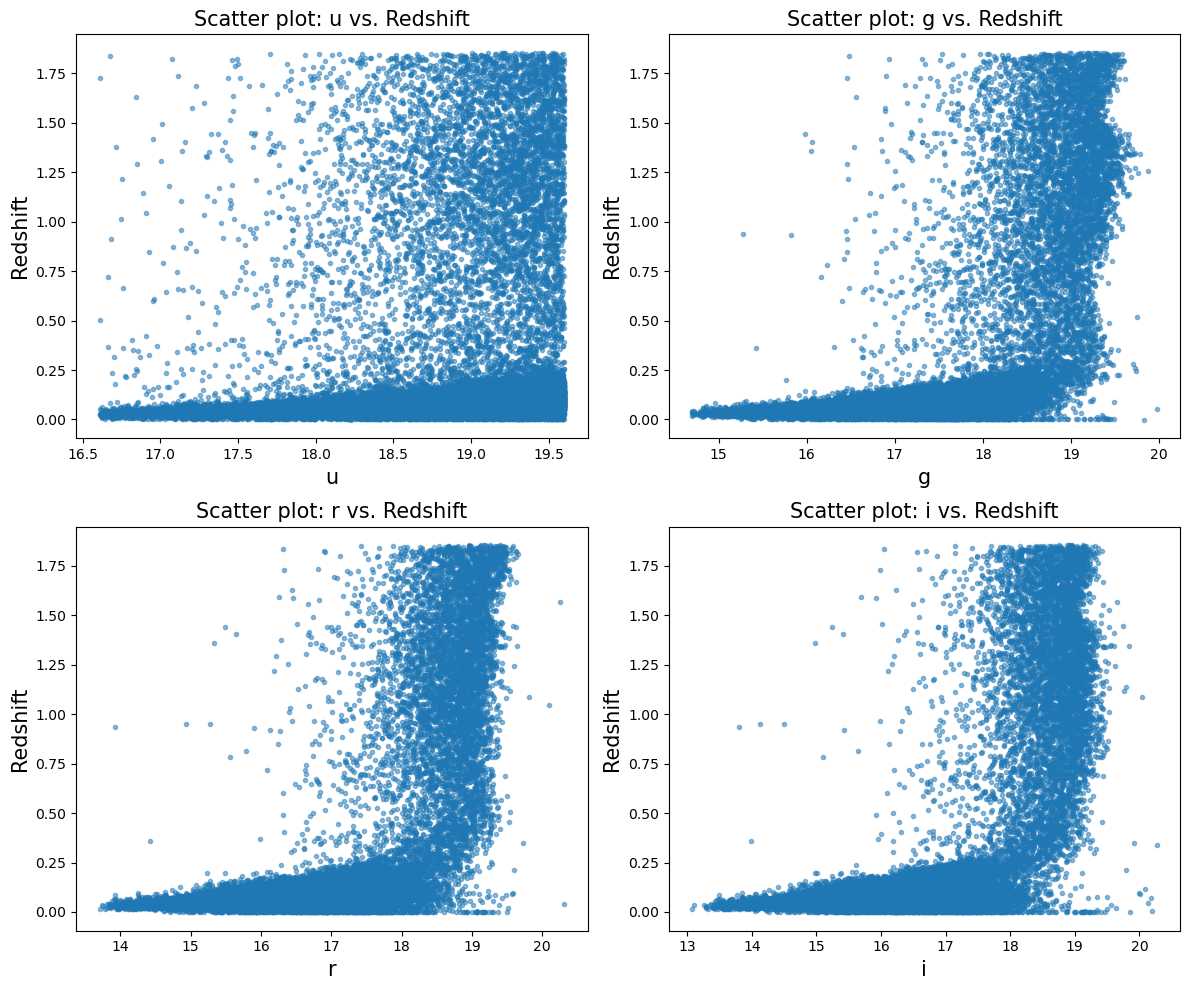

<Figure size 640x480 with 0 Axes>

In [34]:
color_features = ['u', 'g', 'r', 'i']
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
axes = axes.ravel()

for i, feature in enumerate(color_features):
    axes[i].scatter(data[feature], data['redshift'], alpha=0.5, marker='.')
    axes[i].set_xlabel(f'{feature}', fontsize = 15)
    axes[i].set_ylabel('Redshift', fontsize = 15)
    axes[i].set_title(f'Scatter plot: {feature} vs. Redshift', fontsize = 15)

plt.tight_layout()
plt.show()
plt.savefig('u')

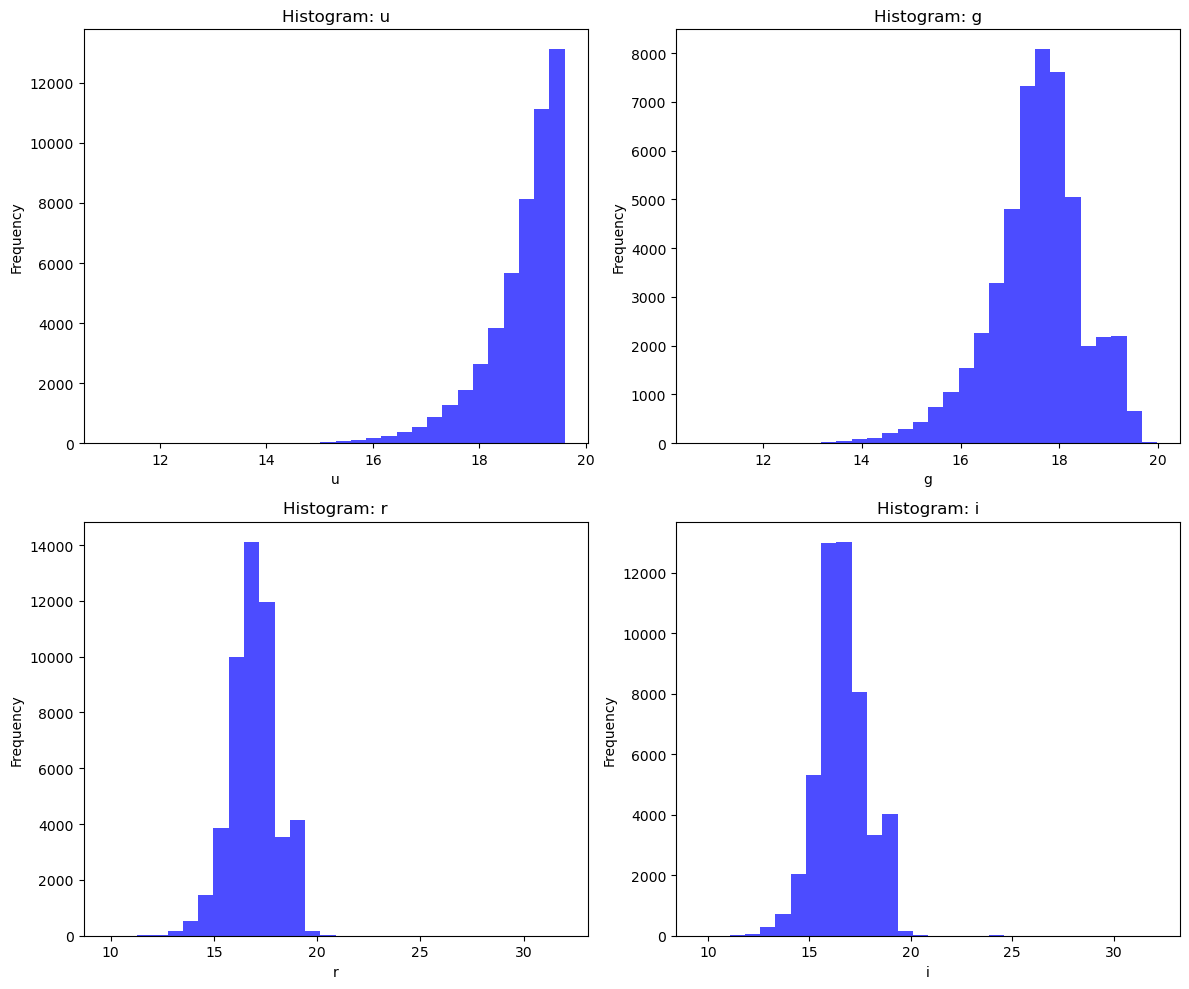

In [9]:
color_features = ['u', 'g', 'r', 'i']
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
axes = axes.ravel()

for i, feature in enumerate(color_features):
    axes[i].hist(data[feature], bins=30, alpha=0.7, color='blue')
    axes[i].set_xlabel(f'{feature}')
    axes[i].set_ylabel('Frequency')
    axes[i].set_title(f'Histogram: {feature}')

plt.tight_layout()
plt.show()

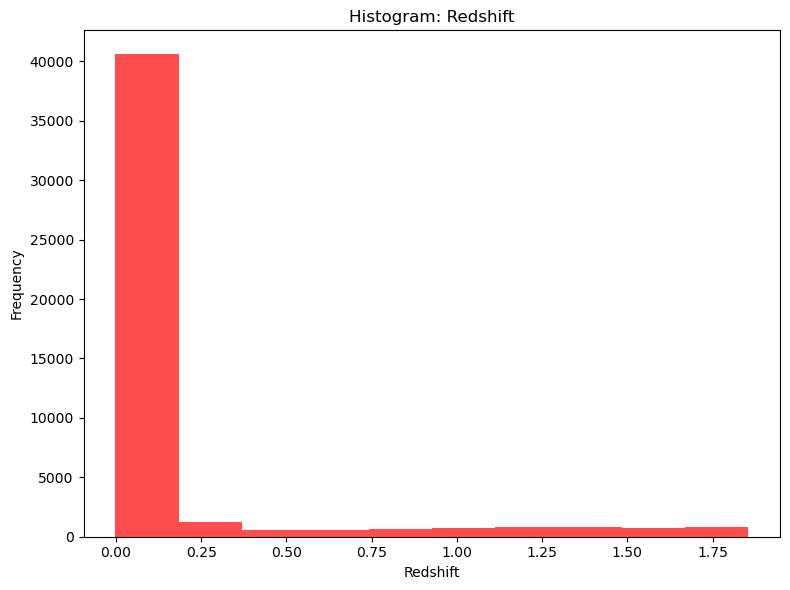

In [3]:

plt.figure(figsize=(8, 6))
plt.hist(data['redshift'], bins=10, color='red', alpha=0.7)
plt.xlabel('Redshift')
plt.ylabel('Frequency')
plt.title('Histogram: Redshift')
plt.tight_layout()
plt.show()